In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import os
import strategy_simulator as ss

import sys
sys.path.append(r'C:\Users\avido\Documents\other code\AlgoTrading')
import utils

#change aspect of plot
plt.rcParams['figure.figsize'] = [10, 3]


### Load and process data

In [2]:
price_data = pd.read_csv(os.path.join('..', 'data', 'scraped_OHLC_10-23-2024', 'BTCUSD.csv'))
price_data['dtime'] = pd.to_datetime(price_data['dtime'], format='%Y-%m-%d %H:%M:%S')
price_data.set_index('dtime', inplace = True)
price_data.dropna(inplace = True)

# price_data = pd.read_pickle(os.path.join('..', 'data', 'SOL', "SOLUSD_price-volume_minute.pickle"))
# price_data

#drop all data prior to 07, 2022
# price_data = price_data.loc[price_data.index >= pd.to_datetime('2022-09-01 00:00:00')]

price_data 

,time,open,high,low,close,vwap,volume,count
dtime,,,,,,,,
2022-04-13 17:33:00,1649871180,41054.5,41054.5,41054.5,41054.5,41054.5,0.609958,9
2022-04-13 17:34:00,1649871240,41054.5,41054.5,41000.0,41000.0,41031.2,0.778243,29
2022-04-13 17:35:00,1649871300,41000.0,41001.6,40991.8,41001.5,40996.8,0.697326,16
2022-04-13 17:36:00,1649871360,41001.6,41001.6,40950.2,40950.2,40972.5,1.606614,17
2022-04-13 17:37:00,1649871420,40950.1,40950.2,40933.2,40933.2,40936.6,0.043350,9
...,...,...,...,...,...,...,...,...
2024-10-24 03:12:00,1729739520,67305.4,67305.4,67305.4,67305.4,67305.4,0.001327,1
2024-10-24 03:13:00,1729739580,67305.5,67305.5,67305.4,67305.5,67305.4,0.008874,5
2024-10-24 03:14:00,1729739640,67305.4,67305.5,67305.4,67305.5,67305.4,0.001254,3


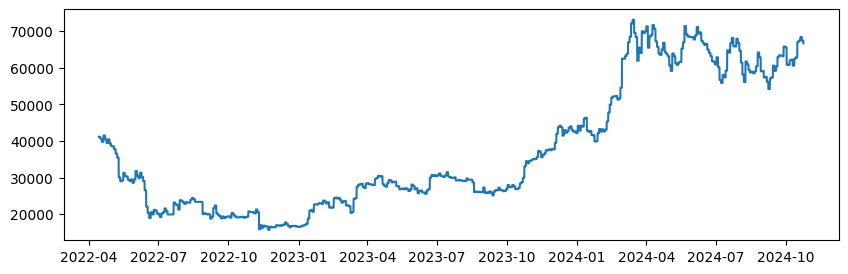

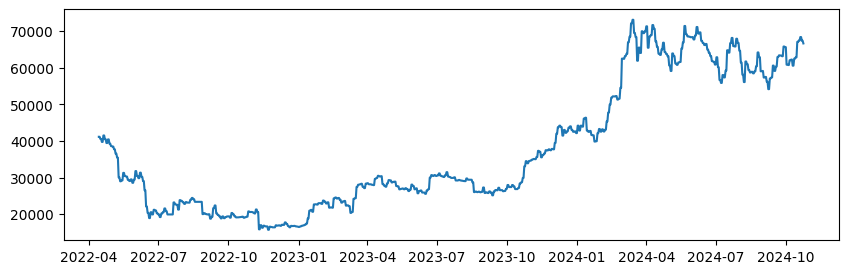

In [62]:
plt.plot(price_data['open'])
plt.show()

# resample to 15 minutes
price_data = utils.ohlc_resampler(price_data, '24h')
plt.plot(price_data['open'])
plt.show()

In [4]:
# x_new = [price_data['open'].iloc[0]]
# for i in range(len(price_data) - 1):
#     price = price_data['open'].iloc[i+1]
#     x_new.append(ss.exponential_moving_average(price, x_new[-1], 0.005))

# price_data['mean'] = x_new
# fig = px.line(price_data, y=['open', 'mean'])
# fig.show()



### Test strategies using trade simulator

If all money was invested at day 0:


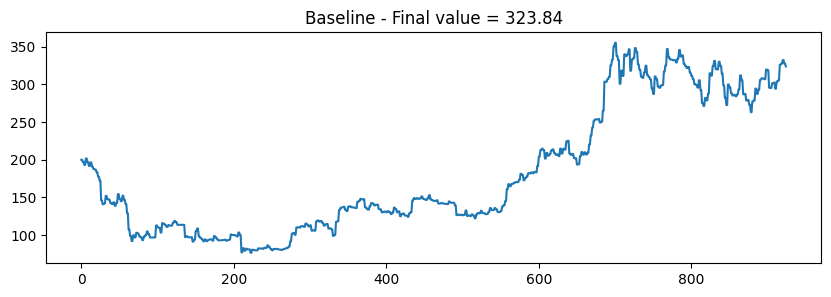

Reserve: 290.4007969107952
Invested: 43.61303827012909
Total: 334.0138351809243
Baseline: 323.84204131227216


numer of trades made: 620


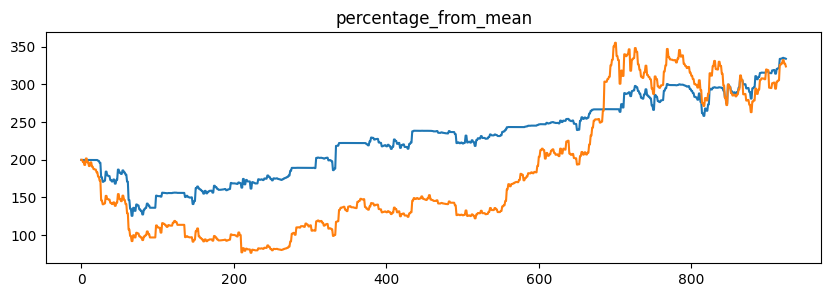

Reserve: 0.0
Invested: 227.95079908201987
Total: 227.95079908201987
Baseline: 323.84204131227216


numer of trades made: 72


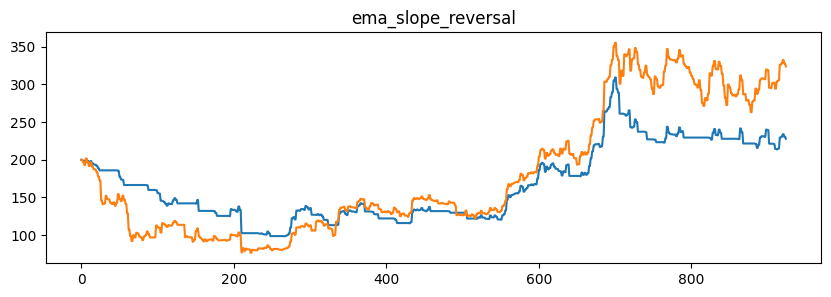

Reserve: 272.98473133247546
Invested: 0.0
Total: 272.98473133247546
Baseline: 323.84204131227216


numer of trades made: 109


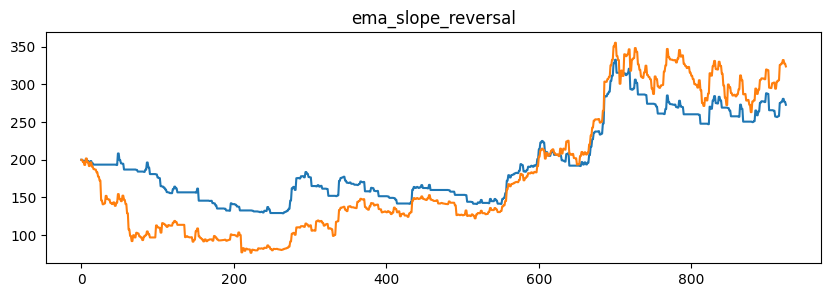

Reserve: 248.52739860891725
Invested: 0.0
Total: 248.52739860891725
Baseline: 323.84204131227216


numer of trades made: 139


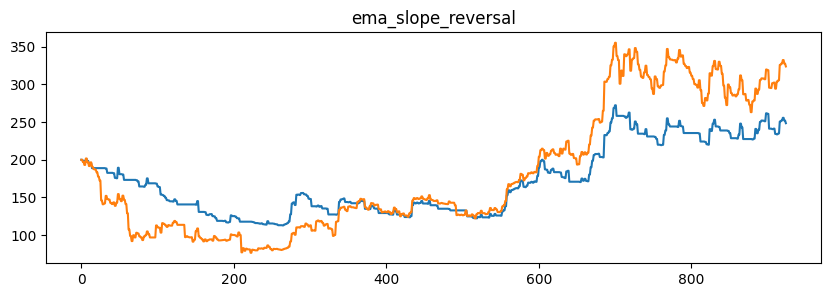

In [64]:
last_n = len(price_data)

strategies = [
    # ss.hodl()
    # ,ss.DCA(period = last_n/10, amount = 10)
    # ,ss.randomDCA(period = last_n/10, amount = 10)
    # ,ss.percentage_from_mean(avg_start = price_data['open'].iloc[-last_n])
    # ,ss.maintain_investment()
    # ,ss.slow_fast_avg(avg_start = price_data['open'].iloc[-last_n], beta_slow = 0.1, beta_fast = 0.3, trade_amount = 1000)
    # ,ss.inverse_slow_fast_avg(avg_start = price_data['open'].iloc[-last_n], beta_slow = 0.1, beta_fast = 0.3, trade_amount = 1000)
    
    # ,ss.slow_fast_avg(avg_start = price_data['open'].iloc[-last_n], beta_slow = 0.1, beta_fast = 0.3, trade_amount = 10)
    # ,ss.inverse_slow_fast_avg(avg_start = price_data['open'].iloc[-last_n], beta_slow = 0.1, beta_fast = 0.3, trade_amount = 10)
    
    # ,ss.avg_derivitive(avg_start = price_data['open'].iloc[-last_n], beta = 0.1)
    # ,ss.opportunistic(avg_start = price_data['open'].iloc[-last_n], beta = 0.05, thresh_percent = .05, trade_amount = 1)
    # ,ss.momentum(trade_amount = .1,trade_cap=1 )
    # ,ss.inverse_momentum(trade_amount = .1,trade_cap=1 ),
    # ss.copy_last(),
    # ss.decorrelation_time_copy_last(),
    # ss.decorrelation_time_copy_last(amount=50, decor_time_thresh = 25, window = 100),
    # ss.decorrelation_time_copy_last(amount=50, decor_time_thresh = 100, window = 500),
    
    # ss.decorrelation_time_copy_last(amount=50, decor_time_thresh = 10, window = 40),
    # ss.decorrelation_time_copy_last(amount=50, decor_time_thresh = 20, window = 40),
    # ss.decorrelation_time_copy_last(amount=50, decor_time_thresh = 10, window = 50),
    # ss.copy_last_all_in(),
    # ss.ema_slope(beta=.01),
    # ss.dynamic_ema_slope(beta_factor=.01),
    # ss.ema_accel(beta = 0.1, factor = .1),
    # ss.ema_accel(beta = 0.1, factor = .5),
    # ss.ema_accel(beta = 0.1, factor = 1)
    
    ss.percentage_from_mean(avg_start = 0, beta = 0.2, limit_percent = .10, thresh_percent = .01, adjust = .5), 
    # ss.percentage_from_mean_simple(beta = 0.1, thresh_percent = .005, trade_percent = 1, trade_amount = 10),
    # ss.percentage_from_mean_simple(beta = 0.1, thresh_percent = .01, trade_percent = 1, trade_amount = 10),
    # ss.threshold_buy_sell(threshold_up = 0.01, trade_percent_up = 10, trade_amount_up = 10, threshold_down = 0.01, trade_percent_down = 10, trade_amount_down = 10),
    # ss.threshold_buy_sell(threshold_up = 0.05, trade_percent_up = 10, trade_amount_up = 10, threshold_down = 0.05, trade_percent_down = 10, trade_amount_down = 10),
    ss.ema_slope_reversal(beta = 0.1),
    ss.ema_slope_reversal(beta = 0.2),
    ss.ema_slope_reversal(beta = 0.3)
    # ss.decorrelation_time_copy_last_all_in(decor_time_thresh = 5, window = 40),
    # ss.decorrelation_time_copy_last_all_in(decor_time_thresh = 20, window = 40),
    # ss.decorrelation_time_copy_last_all_in(decor_time_thresh = 5, window = 100), ###
    # ss.decorrelation_time_copy_last_all_in(decor_time_thresh = 10, window = 100),
    # ss.decorrelation_time_copy_last_all_in(decor_time_thresh = 5, window = 200),
    # ss.decorrelation_time_copy_last_all_in(decor_time_thresh = 10, window = 200),
]

print('If all money was invested at day 0:')
plt.plot(price_data[-last_n:]['open'].reset_index(drop = True) * 200 / price_data['open'].iloc[-last_n])
plt.title(f"Baseline - Final value = {np.round(price_data['open'].iloc[-1] / price_data['open'].iloc[-last_n] * 200, 2)}")
plt.show()

for s in strategies:
    sim = ss.trade_simulator(price_data[-last_n:]['open'].reset_index(drop = True), 
                             initial_invested = 100, 
                             initial_reserve = 100, 
                             trade_cost = 0.00, 
                             trade_cost_percent = 0.25)
    sim.run(s)
    # plt.plot(sim.invested_ot)
    plt.plot(np.array(sim.invested_ot)+np.array(sim.reserve_ot))
    plt.plot(sim.baselines)
    plt.title(s.__class__.__name__)
    print(f"numer of trades made: {np.sum(np.array(sim.trades) != 0)}")
    plt.show()

219767

In [ ]:
last_n = len(price_data)

strategies = [
    ss.opportunistic(avg_start = price_data['open'].iloc[-last_n], beta = 0.05, thresh_percent = .05, trade_amount = 1)
    , ss.opportunistic(avg_start = price_data['open'].iloc[-last_n], beta = 0.005, thresh_percent = .04, trade_amount = 1)
]

for s in strategies:
    print(s.__class__.__name__)
    print(s.__dict__)
    sim = ss.trade_simulator(price_data[-last_n:]['open'].reset_index(drop = True))
    sim.run(s)

opportunistic
{'avg': 41040.3, 'avg_ot': [], 'beta': 0.05, 'thresh_percent': 0.05, 'trade_amount': 1}
Reserve: 38
Invested: 136.79573883192518
Total: 174.79573883192518
Baseline: 160.02441502620593


opportunistic
{'avg': 41040.3, 'avg_ot': [], 'beta': 0.005, 'thresh_percent': 0.04, 'trade_amount': 1}
Reserve: 160.21584740795805
Invested: 0.0
Total: 160.21584740795805
Baseline: 160.02441502620593


